In [1]:
from PIL import Image
import numpy as np
import nbimporter
import pickle

In [2]:
from tensorflow.keras.models import load_model
from ocr_easy import EasyReceiptOCR
from text_clasification import predict_stage1_and_stage2
from text_clasification import extract_text_values

In [3]:
def clean_data(data):
    cleaned_data = []
    for item in data:
        for word in item.get('words', []):
            cleaned_data.append({
                'quad': word.get('quad'),
                'text': word.get('text')
            })
    return cleaned_data

[{'quad': {'x1': 312, 'y1': 248, 'x2': 378, 'y2': 248, 'x3': 378, 'y3': 274, 'x4': 312, 'y4': 274}, 'text': '29,091'}, {'quad': {'x1': 44, 'y1': 276, 'x2': 246, 'y2': 276, 'x3': 246, 'y3': 300, 'x4': 44, 'y4': 300}, 'text': 'CREAMY BEEF CLS FtC'}, {'quad': {'x1': 311, 'y1': 270, 'x2': 382, 'y2': 270, 'x3': 382, 'y3': 301, 'x4': 311, 'y4': 301}, 'text': '42,727'}, {'quad': {'x1': 42, 'y1': 301, 'x2': 173, 'y2': 301, 'x3': 173, 'y3': 326, 'x4': 42, 'y4': 326}, 'text': 'NEW @RIENTAL'}, {'quad': {'x1': 180, 'y1': 300, 'x2': 268, 'y2': 300, 'x3': 268, 'y3': 326, 'x4': 180, 'y4': 326}, 'text': 'CKX RICE'}, {'quad': {'x1': 314, 'y1': 298, 'x2': 384, 'y2': 298, 'x3': 384, 'y3': 324, 'x4': 314, 'y4': 324}, 'text': '34,545'}, {'quad': {'x1': 40, 'y1': 328, 'x2': 196, 'y2': 328, 'x3': 196, 'y3': 354, 'x4': 40, 'y4': 354}, 'text': 'LIPTON PITCHER'}, {'quad': {'x1': 314, 'y1': 324, 'x2': 386, 'y2': 324, 'x3': 386, 'y3': 352, 'x4': 314, 'y4': 352}, 'text': '54,545'}, {'quad': {'x1': 38, 'y1': 354, '

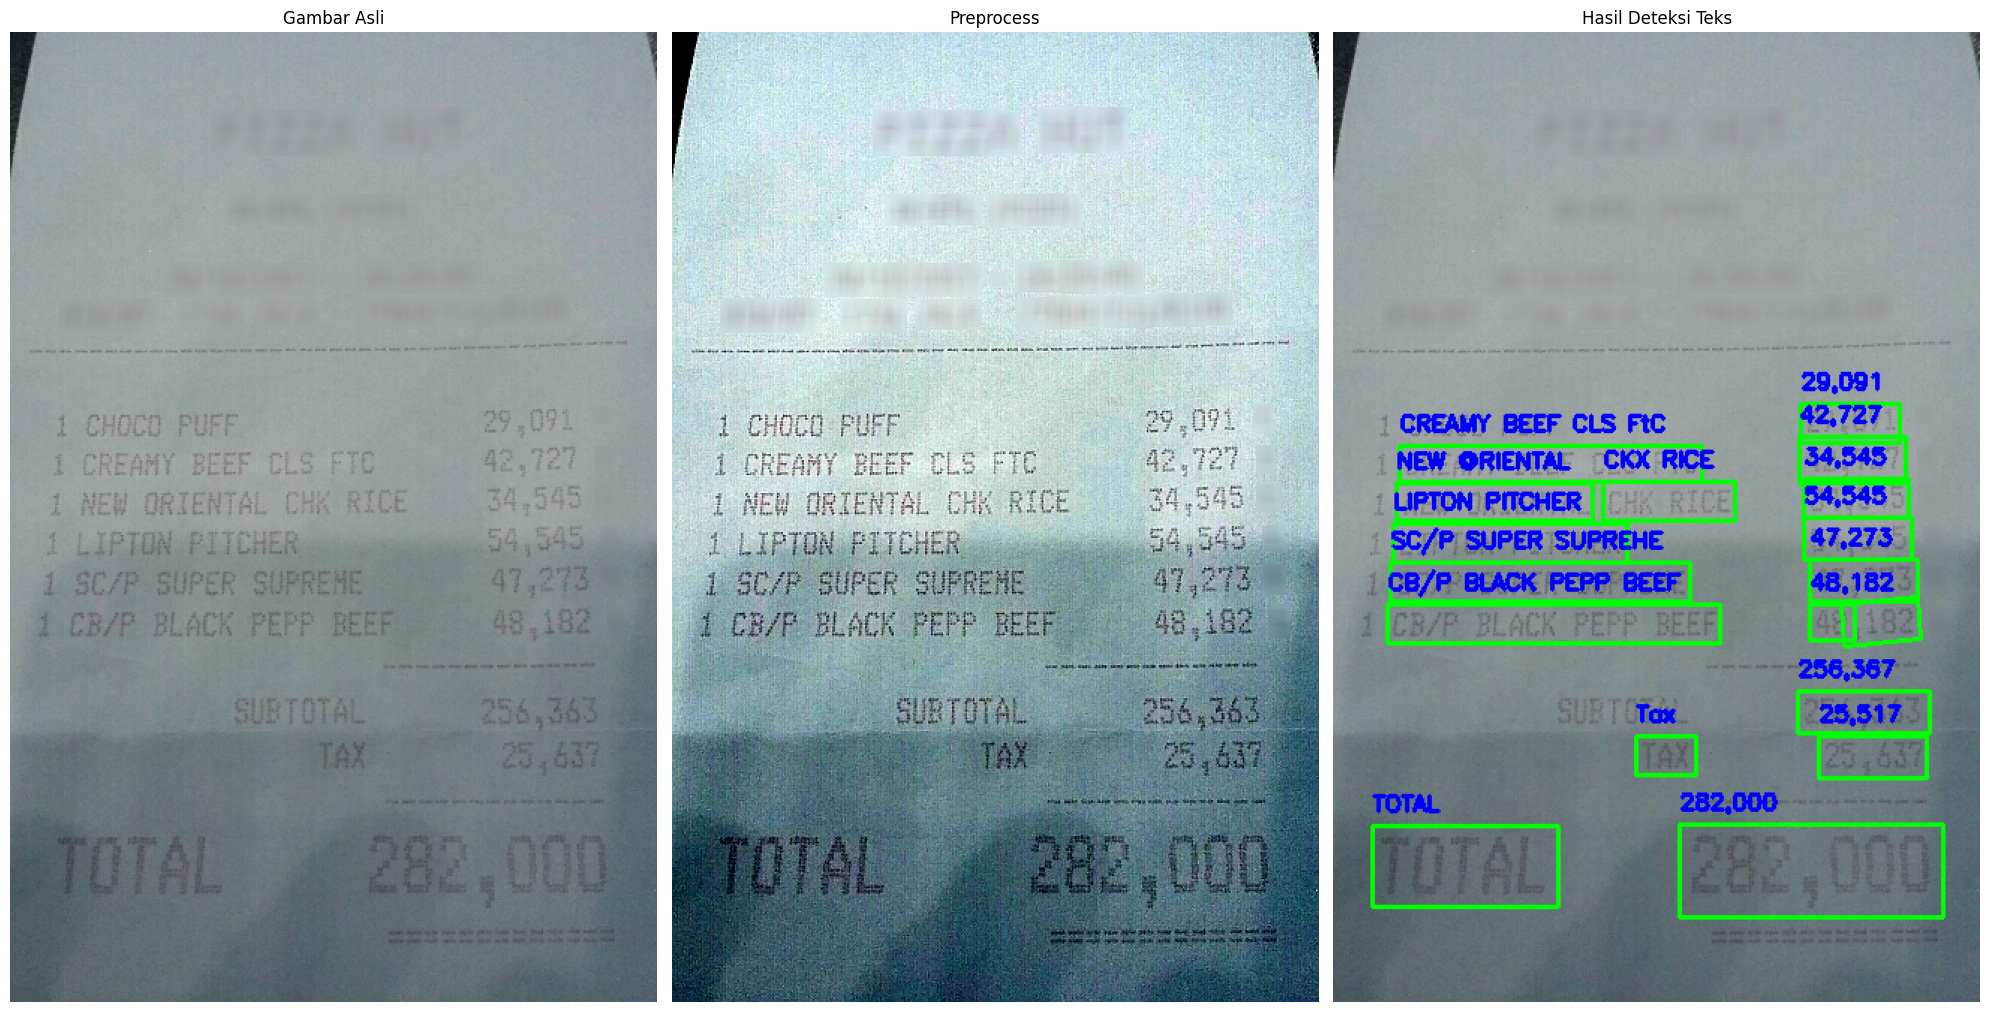

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer', 'input_layer_1']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['input_layer_2', 'input_layer_3']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
{
    "total_value": 282000.0,
    "tax_value": 25517.0
}


In [5]:
def main():
    # Contoh penggunaan EasyReceiptOCR
    ocr = EasyReceiptOCR(['en', 'id'])  # Menambahkan bahasa yang diperlukan, misalnya ['en', 'id']
    
    # Path gambar yang akan diproses
    image_path = "output_images_test/image_75.png"
    
    # Membaca gambar
    image = Image.open(image_path)
    image_data = np.array(image)  # Convert to NumPy array

    # Ekstraksi teks dan lokasi
    easy_results, receipt_data, visualization_image = ocr.extract_text_and_location(image_data)

    # Membersihkan hasil ekstraksi data
    cleaned_result = clean_data(receipt_data)
    print(cleaned_result)  # Verifikasi bahwa cleaned_result sudah didefinisikan

    # Menampilkan hasil deteksi
    ocr.visualize_results(image_data, visualization_image)

    # Ekstrak teks per baris
    text = ocr.extract_text_by_line(image_data)
  
    if len(image_data.shape) == 3:  # If the image has 3 dimensions (e.g., RGB)
        image_height, image_width, _ = image_data.shape  # Ignore the channels dimension
    else:
        image_height, image_width = image_data.shape  # For grayscale images, only height and width
    image_size = {'width': image_width, 'height': image_height}

    # Load the models
    model_stage1 = load_model("model_stage1.h5")
    model_stage2 = load_model("model_stage2.h5")  
    # Load tokenizers and label encoders
    with open("char_to_idx.pkl", "rb") as file:
        char_to_idx = pickle.load(file)

    with open("label_encoder_stage1.pkl", "rb") as file:
        label_encoder_stage1 = pickle.load(file)

    with open("label_encoder_stage2.pkl", "rb") as file:
        label_encoder_stage2 = pickle.load(file)

    # Prediksi menggunakan hasil yang sudah dibersihkan
    predicted_results = predict_stage1_and_stage2(
        input_data=cleaned_result,
        model_stage1=model_stage1,
        model_stage2=model_stage2,
        char_to_idx=char_to_idx,
        label_encoder_stage1=label_encoder_stage1,
        label_encoder_stage2=label_encoder_stage2,
        image_size=image_size
    )

    # Menggunakan fungsi untuk menghasilkan JSON
    result_json = extract_text_values(predicted_results)

    # Cetak hasil dalam format JSON
    import json
    print(json.dumps(result_json, indent=4))


if __name__ == "__main__":
    main()
